# 머신러닝 이해

- 회귀 예측, 분류 예측, 최적의 추천 등을 수행하는 소프트웨어로, 데이터를 보고 학습하며 다량의, 다양한 데이터로 학습시킬수록 점차 성능이 개선되는 방식으로 구현된다
- 현재 인공지능을 구현하는 대표적인 방법이 머신러닝 기법이다
 - "Machine Learning"이란 컴퓨터가 데이터를 보고 스스로 학습한다는 의미이다
 - 예전에는 인공지능을 구현하기 위해서 "생각하는" 컴퓨터를 만들거나, 사람의 지식을 알고리즘이나 데이터로 구축하는 방법을 시도하였으나 성공하지 못했다 
- [강의자료](https://github.com/StillWork/image/blob/main/AIDD-LAIDD-2022.pdf?raw=1)

## 머신러닝 구현 방법

- 입력 데이터(X)를 보고 원하는 출력(y)을 얻는 방식으로 동작하며 예측 오차를 줄이도록 학습을 시킨다  

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.38.png?raw=1" align='left'>

### 데이터 (X)
- 훈련 (train) 데이터: 모델을 학습시키는데 사용하는 데이터
- 검증 (validation) 데이터: 학습시킨 모델의 동작을 검증하는데 사용하는 데이터
- 학습에 사용하는 데이터가 많을수록 예측, 추천 성능이 향상된다
 - 데이터 타입: 정형 데이터(테이블 데이터), 비정형 데이터(이미지, 텍스트, 센서 데이터 등)
- 머신러닝 모델의 성능을 높이기 위해서는 원시(raw) 데이터로부터 적절한 학습 및 검증 데이터를 만드는 **데이터 전처리**가 반드시 필요하다

### 머신러닝 모델
- 입력 데이터(X)로부터 최적의 출력(y)을 얻는 소프트웨어
- 최적의 출력이란 정답(label, target)을 잘 예측하는 것을 말한다
 - 최적의 출력을 얻기 위해서 모델을 구성하는 파라미터의 최적치를 찾는다(예: 선형 회귀에서 가중치 값)
- 모델의 종류: 선형모델, 로지스틱 회귀, SVM, 결정트리, 랜덤 포레스트, kNN, 베이시언, 딥러닝 모델 (MLP, CNN, RNN, GCN, Transformer 등)

### 목적
- 머신러닝의 목적은 다음 중 하나이다
 - 예측(predictive) 분석
> 회귀 예측(regression): 수치를 예측  
> 분류 예측(classification): 카테고리를 예측
 - 설명(descriptive)적 분석
 - 군집화(clustering)
 - 추천(recommendation)
 
### 성능평가 (performance measure)
- 모델이 원하는 동작을 잘 수행하는지를 평가하는 값으로, 주요 평가 척도는 다음과 같다
 - 회귀모델에서는 R-squared를 사용
 - 분류 모델에서는 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수, ROC-AUC 등을 사용 
 
### 최적화기 (optimizer)
- 학습을 통하여 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 최적화 알고리즘으로는 경사하강법(GD: gradient descent)이 기본적으로 사용된다 

### 손실함수 (loss function)
- 최적화기는 손실함수를 최소화 하는 방향으로 동작한다
- 즉, 손실함수는 최적화기의 동작이 잘 이루어지고 있는지를 모니터링하는 값이다
- 손실함수로, 회귀 모델에서는 MSE(mean square error)를, 분류에서는 크로스 엔트로피(cross entrophy)를 주로 사용한다


# import

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%config InlineBackend.figure_format = 'retina' 
warnings.filterwarnings("ignore")
%matplotlib inline

from rdkit import Chem 
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructsfrom rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole     # 화면에 출력하기 위한 옵션
IPythonConsole.ipython_useSVG=True

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 데이터

- 소분자 유기화합물의 lipophilicity 데이터 (용해도) 사용

- **Lipophilicity** 는 화합물이 lipids, oils 등 비극성 용매에 용해되는 물리적 특성을 나타낸다

- 이는 분배 계수 distribution coefficent P로 표현된다
 - 물과 옥탄올에 대한 평형상태의 용해농도의 비률로 표현된다
 - P 값이 클수록 지질 친화성이 큰 것을 나타낸다 (보통 log10P를 사용한다)
 - 실험적으로 이 값을 구하려면 많은 노력이 필요하다. 머신러닝으로 용해도를 예측하는 모델을 만들업겠다 


In [ ]:
# 데이터 다운로드 (컬럼명을 'smiles'와 'logP'로 지정)
logP_data = pd.read_csv('https://raw.githubusercontent.com/StillWork/data/master/logP_dataset.csv', 
            names=['smiles', 'logP'])

# csv 파일로 저장
logP_data.to_csv('logP.csv')

# 내용 보기
print(logP_data.shape)
logP_data[:3]

(14610, 2)


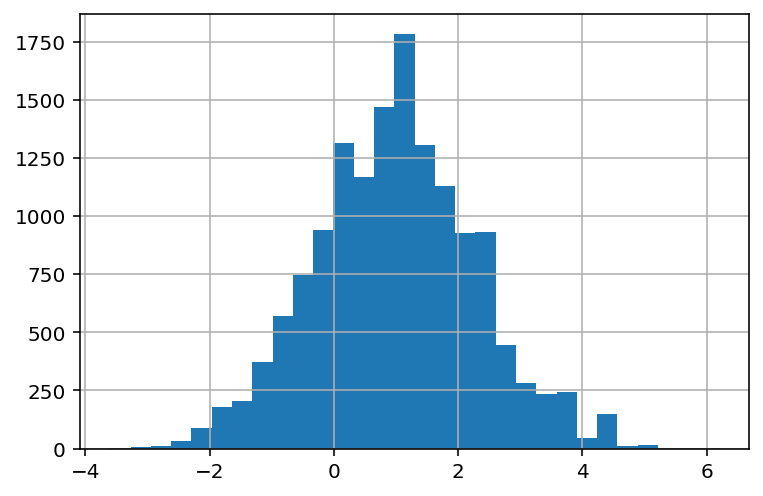

In [ ]:
# 목적 변수 분포
logP_data.logP.hist(bins=30)


## SMILES로부터 Mol 객체 얻기
- Chem.MolFromSmiles() 함수를 이용한다

In [ ]:
# 사본 데이터프레임 사용
df = logP_data.copy() 

In [ ]:
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

# 다른 방법
# df['mol'] = [Chem.MolFromSmiles(x) for x in df['smiles']] 
print(type(df['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


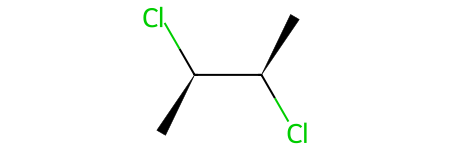

In [ ]:
df.mol[0]

## 시각화
- rdkit.Chem.Draw를 사용하여 mol 객체를 시각화할 수 있다
- Draw.MolsToGridImage()함수 사용

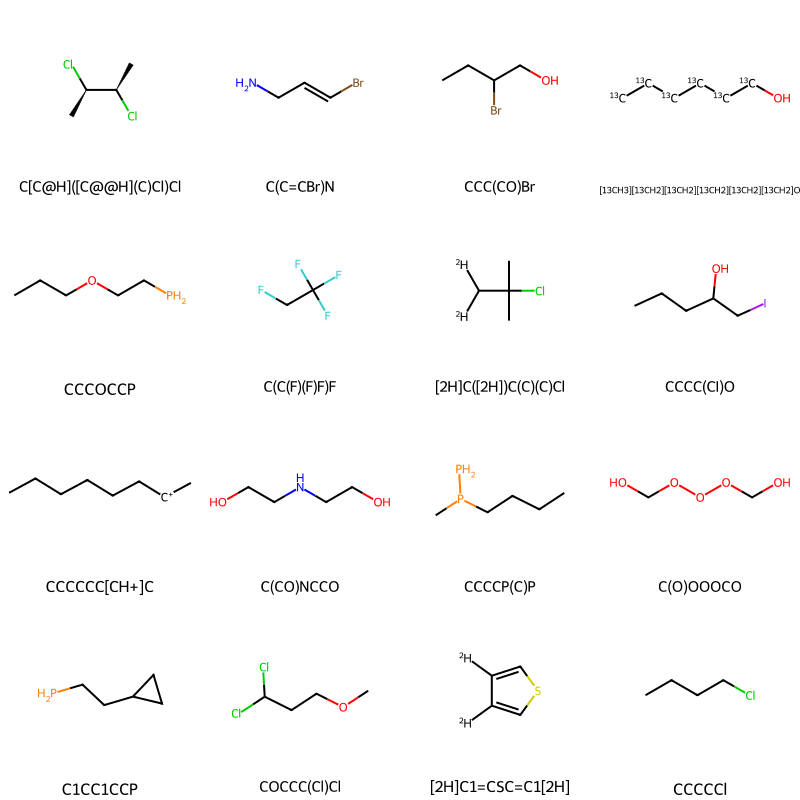

In [ ]:
# 16개 이미지를 그리드 형태로 그리기
mols = df['mol'][:16]
Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True, legends=list(df['smiles'][:16].values))

## 분자 정보 보기

- Chem 모듈에서 다양한 정보 추출 함수를 제공한다
- 예를 들어 mol 객체로부터 분자를 구성하는 원자수를 얻으려면 다음과 같은 함수를 사용하면 된다
 - GetNumAtoms()
 - GetNumHeavyAtoms()
- mol 객체에 수소원자를 포함시키려면 AddHs()를 호출한다


In [ ]:
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
df[:3]

,smiles,logP,mol,num_of_atoms,num_of_heavy_atoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7f77f08c5030>,14,6
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7f77f09567b0>,11,5
2,CCC(CO)Br,1.3,<rdkit.Chem.rdchem.Mol object at 0x7f77f077c170>,15,6


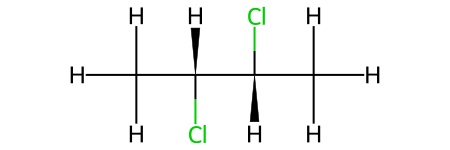

In [ ]:
df.mol[0]

## 특성 추가
- 분자내에 들어 있는 C, O 등 각 원자별 갯수를 특성으로 추가하겠다
- 이를 위해서 분자의 하부 구성을 찾는 GetSubstructMatches()를 사용한다

In [ ]:
# 탄소 패턴을 지정한다
c_patt = Chem.MolFromSmiles('C')

# 이 패턴이 들어있는 곳을 찾는다. 패턴의 수를 세면 탄소 원자가 몇개 들어있는지 알 수 있다
print(df['mol'][0].GetSubstructMatches(c_patt))

((0,), (1,), (2,), (3,))


In [ ]:
# 임의의 패턴(원자)를 몇개 포함하고 있는지를 얻는 함수
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl'], df)

In [ ]:
df[:3]

,smiles,logP,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7f77f08c5030>,14,6,4,0,0,2
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7f77f09567b0>,11,5,3,0,1,0
2,CCC(CO)Br,1.3,<rdkit.Chem.rdchem.Mol object at 0x7f77f077c170>,15,6,4,1,0,0


# 회귀 모델
- 위에서 구한 분자의 여러 특성을 사용하여 용해도를 예측한다

## 훈련/검증 데이터 나누기

In [ ]:
# 특성 컬럼을 선택하여 X를 만들고 목적변수를 정의한다
train_df = df.drop(columns=['smiles', 'mol', 'logP'])
y = df['logP'].values

print(train_df.columns)

# 훈련과 검증 데이터를 나눈다 (검증 데이터로 10% 할당)
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.1)


Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms'],
      dtype='object')


- 아래는 훈련과 검증 데이터를 나누는 개념도이다. 주어진 데이터 순서를 유지하면서 데이터를 나누려면 shuffle=False 옵션을 지정하면 된다 (디폴트 값은 랜덤하게 섞는다)

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

- 회귀 모델의 여러 성능 평가 지표를 보는 함수 정의

In [ ]:
def show_reg_result(y_test, y_pred, N=50):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    R2 = r2_score(y_test, y_pred)
    max_err = np.abs(y_test - y_pred).max()
    
    print('R2:', round(R2,4))
    print('MAE:', round(mae, 4))
    print('RMSE:', round(rmse,4))
    print('Max error:', round(max_err, 4))

    # 일부 실제값과 예측값 샘플을 plot으로 비교하여 그려본다 (N 개)
    
    if N > 0:
      plt.figure(figsize=(10, 6))
      plt.plot(y_pred[:N], ".b-", label="prediction", linewidth=1.0)
      plt.plot(y_test[:N], '.r-', label="actual", linewidth=1.0)
      plt.legend()
      plt.ylabel('logP')
      plt.show()  

## 선형모델

R2: 0.6838
MAE: 0.5694
RMSE: 0.7292
Max error: 3.0418


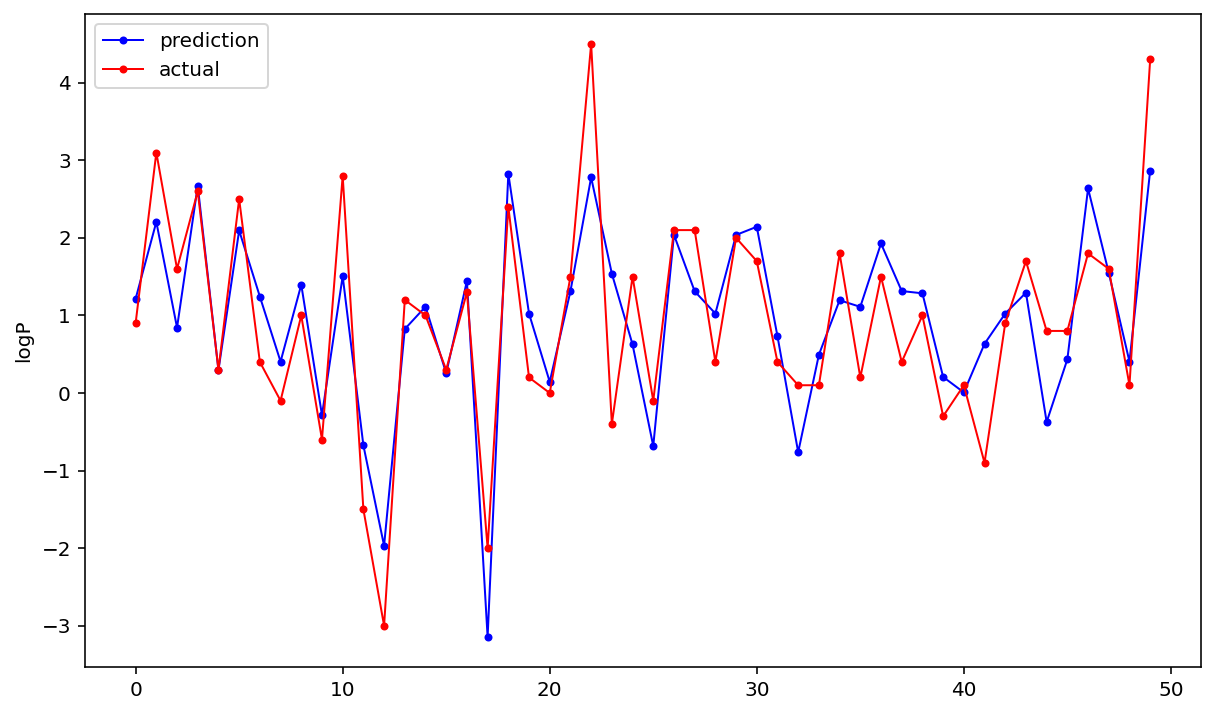

In [ ]:
# 모델 학습 및 성능 평가
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
show_reg_result(y_test, y_pred)

### 회귀 모델 성능 평가
- 회귀 모델의 성능을 평가하는 척도로 기본적으로 R-Squared를 사용하며 MAE, RMSE 등을 참고로 본다
 - MAE: mean absolute error  
 - MSE: mean squared error    
 - RMSE: root MSE  

$MAE = $$1\over{N}$$ \sum |y_{i} - \hat{y}|$

$MSE = $$1\over{N}$$ \sum (y_{i} - \hat{y})^{2}$

$RMSE = \sqrt{MSE}$

$R^{2} = 1$-$\sum(y_{i}-\hat{y})^{2}\over{\sum(y_{i}-\bar{y})^{2}}$ $= 1$-$MSE\over{Variance}$  
 >  $y$ :  실제값, $\hat{y}$ :  예측치, $\bar{y}$ :  평균치
 
-  R-Squared
 - 회귀 성능의 기본적인 평가 지표
 - MSE를 분산으로 정규화한 값을 사용한다
 - R-sqaured 값은 1에 가까울수록 완벽한 예측을 수행한 것이고, 0 근처이면 오차 평균치가 표준편차 정도인 경우이다

## 분자 특성 추가

- [rdkit.Chem.Descriptors](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html)이 제공하는 함수들을 사용하면 다양한 분자특성들을 알 수 있다. 아래의 특성을 추가하겠다

 - TPSA() - the surface sum over all polar atoms or molecules also including their attached hydrogen atoms;
 - ExactMolWt() - 정확한 몰 중량
 - NumValenceElectrons() - number of valence electrons (may illustrate general electronic density)
 - NumHeteroatoms() - general number of non-carbon atoms
 
- 이외에도 분자의 링정보를 보거나, 원자별로 결합 정보를 볼 수 있다
 - GetRingInfo(), GetAtoms(), GetBonds() 등을 사용

In [ ]:
df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

- 특성을 추가했을 때의 성능을 비교하겠다

In [ ]:
train_df = df.drop(columns=['smiles', 'mol', 'logP'])
y = df['logP'].values

print(train_df.columns)
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.1, random_state=1)

Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'tpsa', 'mol_w',
       'num_valence_electrons', 'num_heteroatoms'],
      dtype='object')


R2: 0.7907
MAE: 0.4625
RMSE: 0.5932
Max error: 2.2606


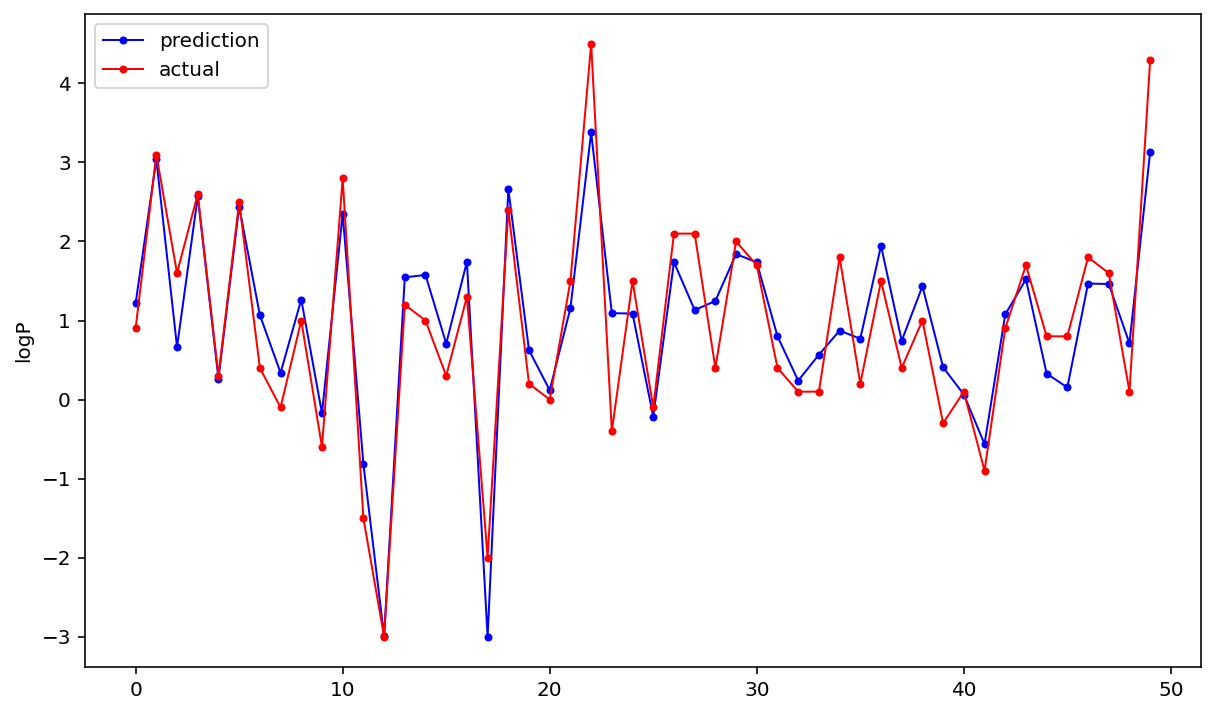

In [ ]:
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
show_reg_result(y_test, y_pred)

In [ ]:
# 선형 모델 가중치를 보는 함수 정의

def plot_feature_weight(feature, weight):
    # plt.figure(figsize=(5,8)) # 특성수가 많은 경우
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

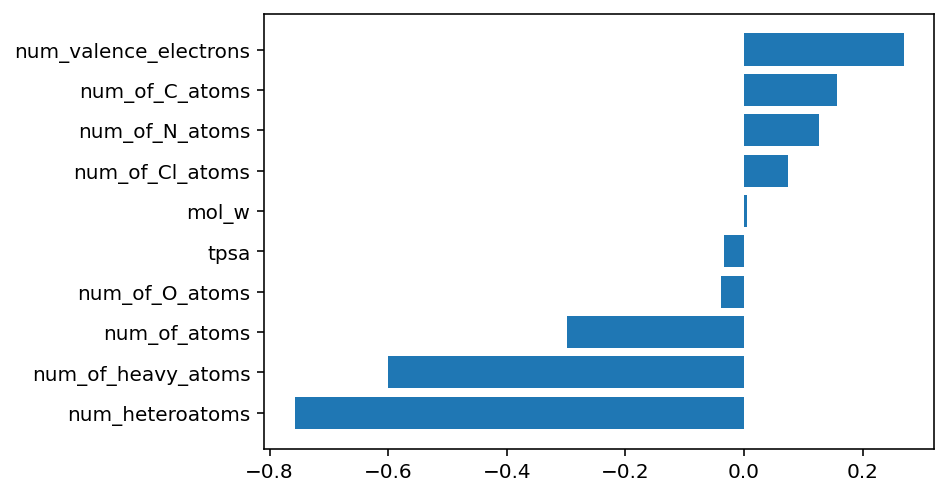

In [ ]:
plot_feature_weight(train_df.columns, lin.coef_)

# 트리 모델
- 결정 트리, 랜덤포레스트

In [ ]:
# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다

for depth in range(1,30,2):
    dtr = DecisionTreeRegressor(max_depth=depth) 
    dtr.fit(X_train, y_train) 
    print(depth, dtr.score(X_test, y_test).round(3)) 

1 0.425
3 0.682
5 0.766
7 0.81
9 0.836
11 0.843
13 0.861
15 0.862
17 0.868
19 0.863
21 0.868
23 0.856
25 0.857
27 0.867
29 0.862


R2: 0.8601
MAE: 0.343
RMSE: 0.485
Max error: 2.9


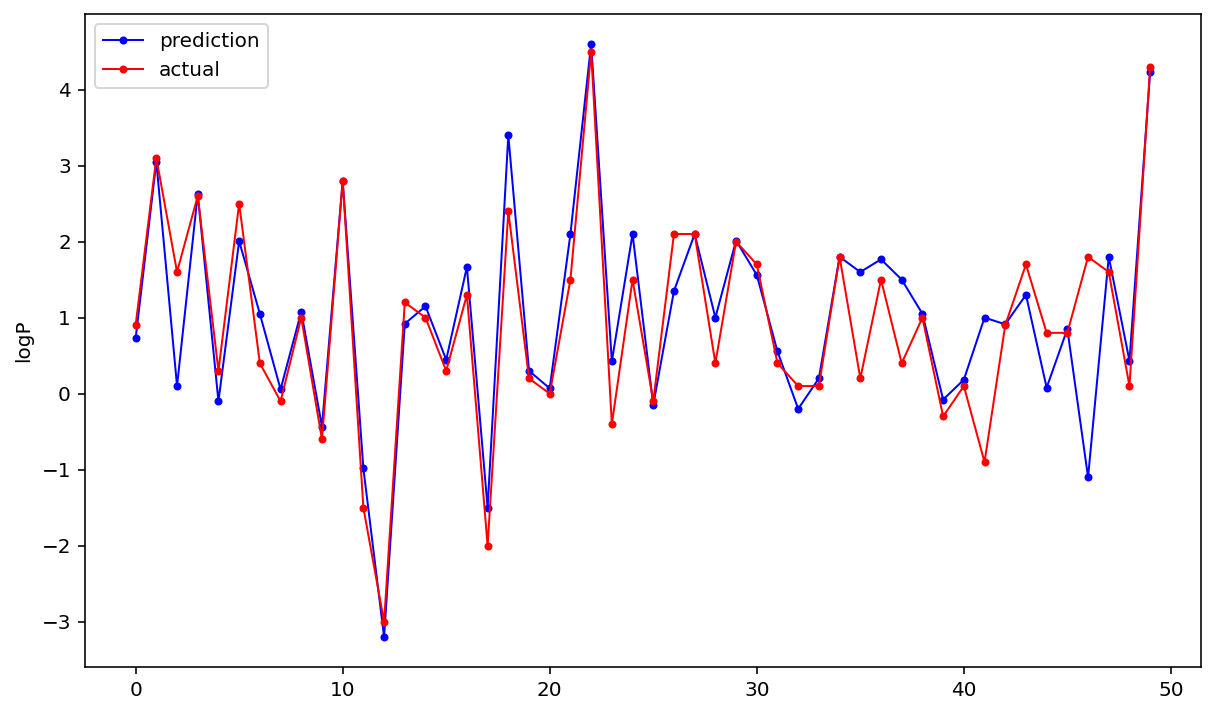

In [ ]:
# 결정 트리 회귀 모델

dtr = DecisionTreeRegressor(max_depth=17) 
dtr.fit(X_train, y_train) 
y_pred = dtr.predict(X_test)
show_reg_result(y_test, y_pred)

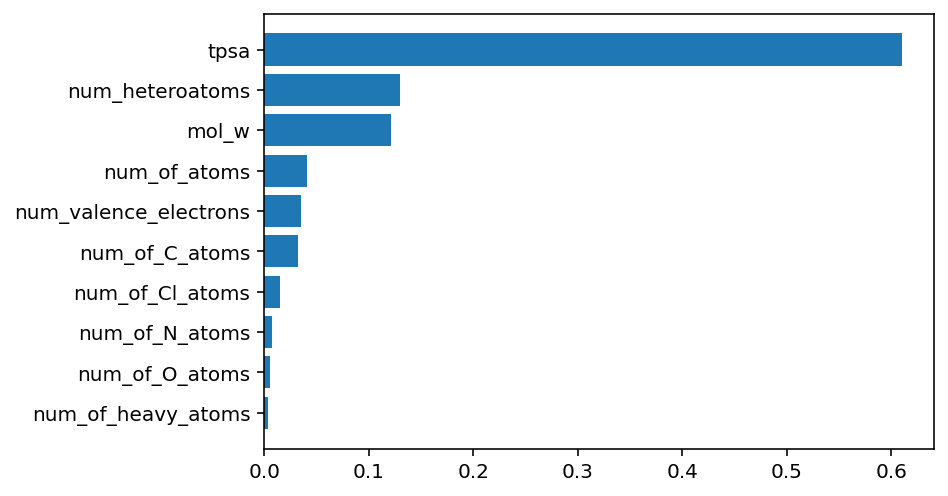

In [ ]:
# 트리 모델이 제공하는 특성 중요도 (feature_importances_) 보기

plot_feature_weight(train_df.columns, dtr.feature_importances_)

## 랜덤 포레스트 모델

R2: 0.895
MAE: 0.3108
RMSE: 0.4202
Max error: 1.8737


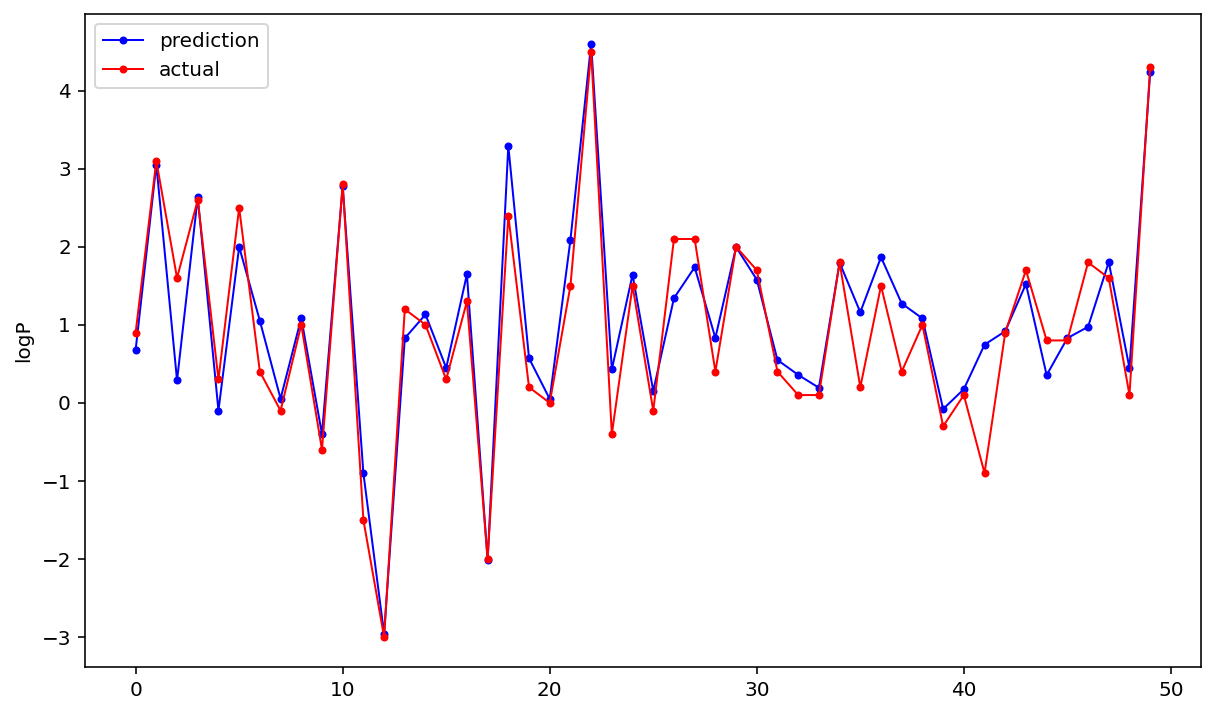

In [ ]:
rfr = RandomForestRegressor() 
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test, y_pred)

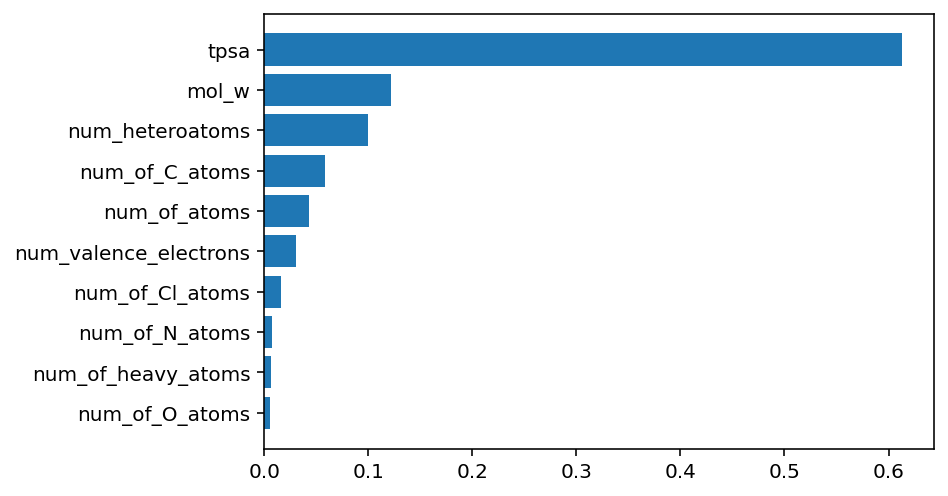

In [ ]:
# 랜덤 포레스트 모델이 제공하는 특성 중요도 (feature_importances_) 보기

plot_feature_weight(train_df.columns, rfr.feature_importances_)

## 트리 그리기

- depth=3 까지만 그려보겠다

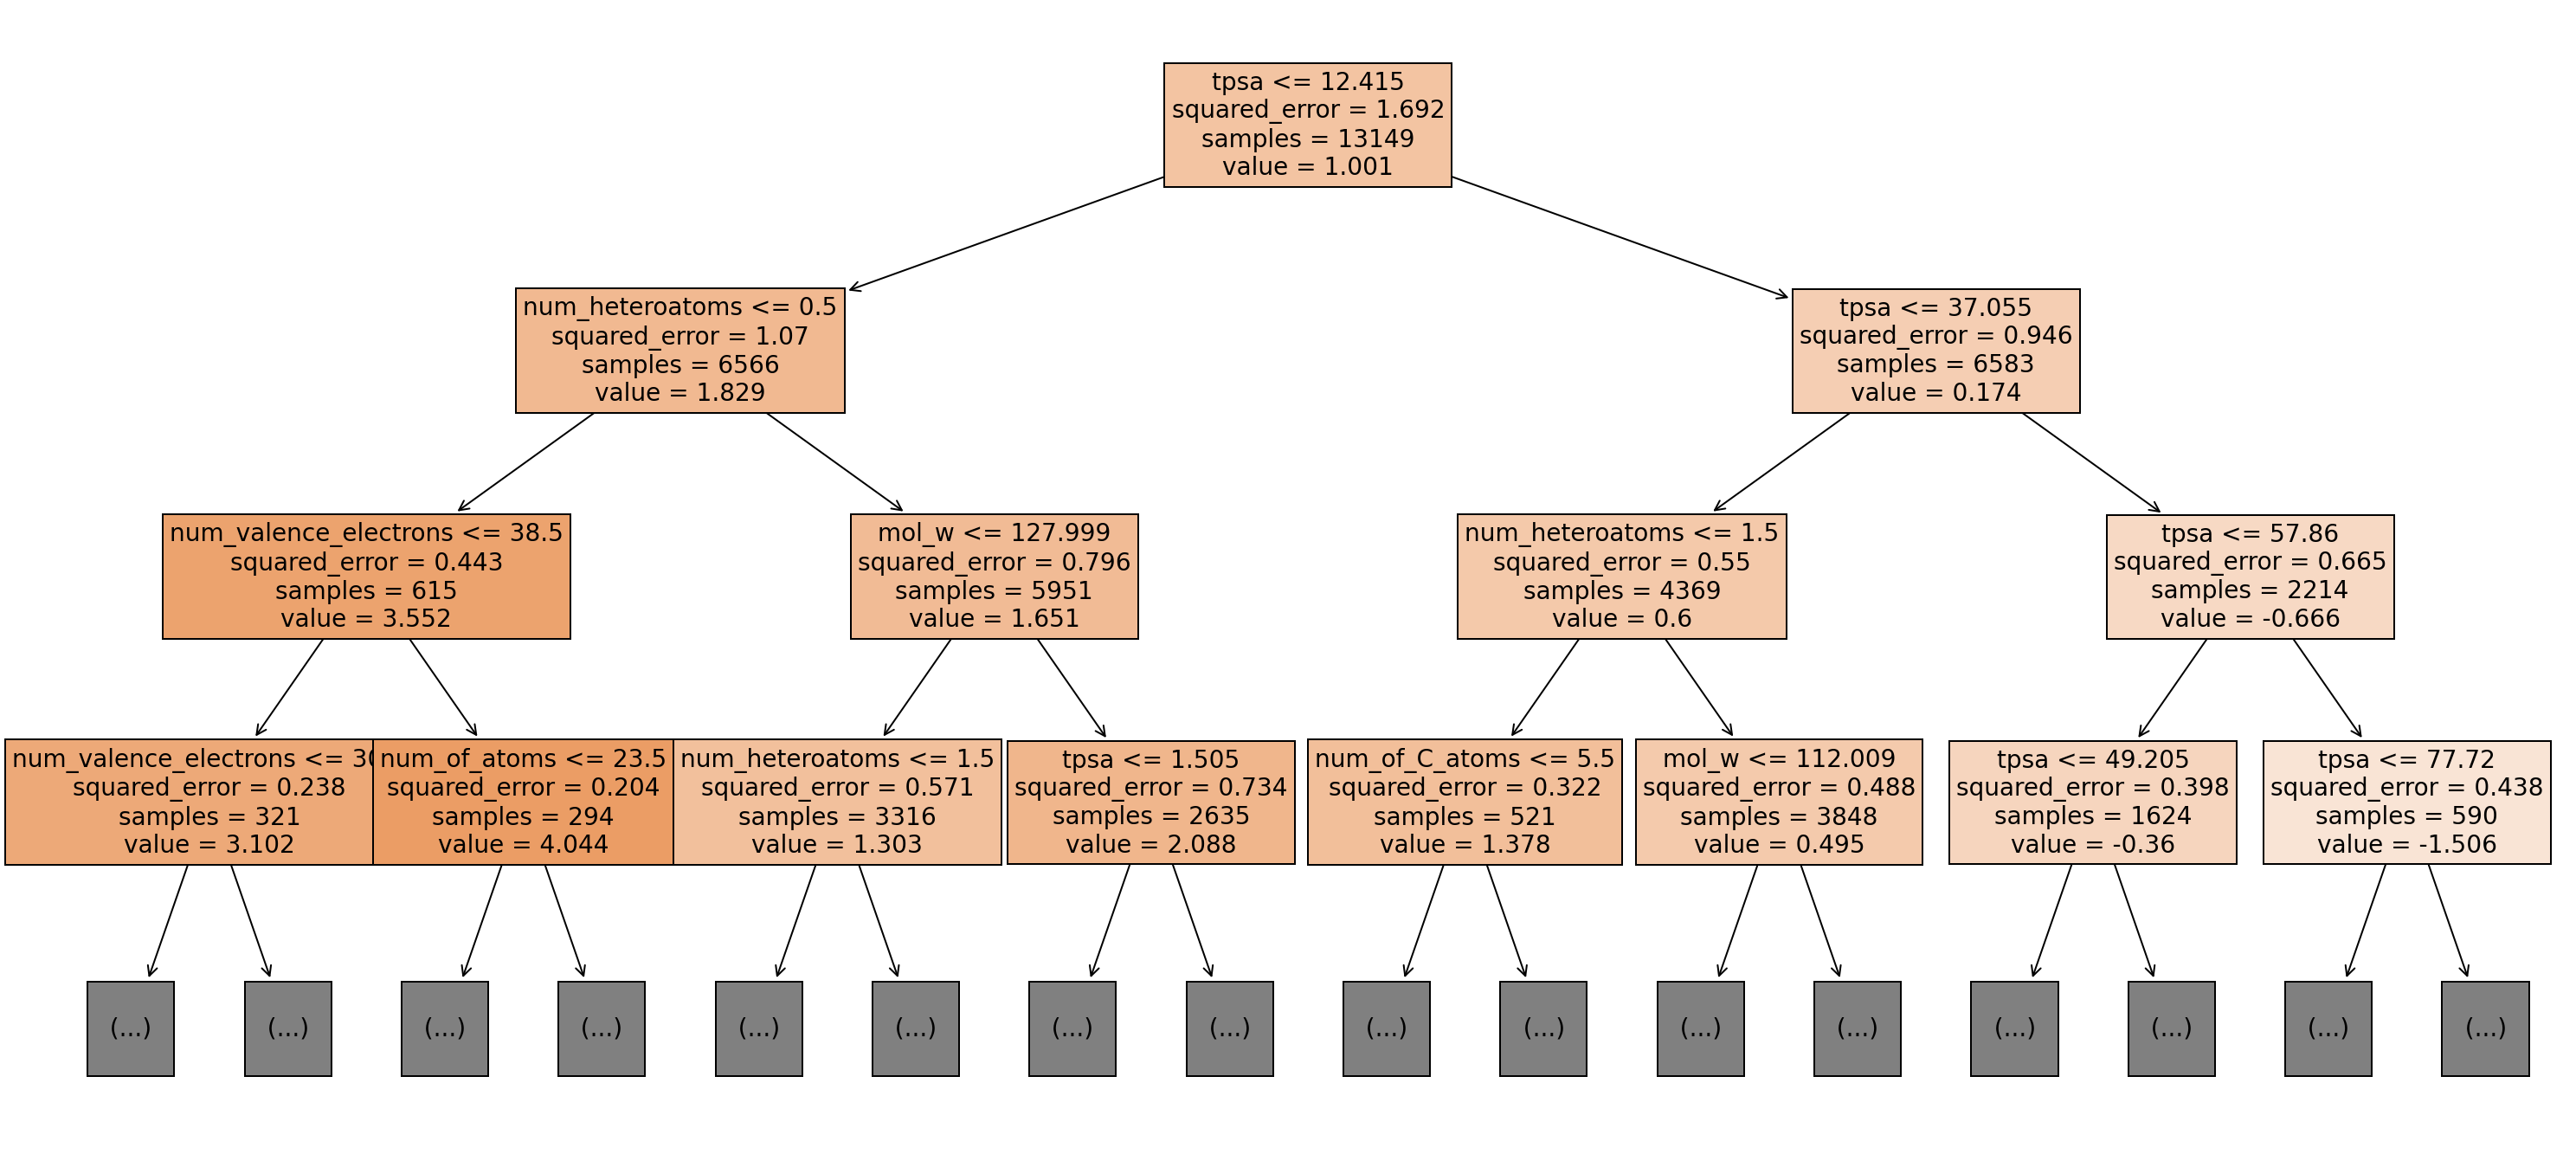

In [ ]:
from sklearn import tree
import matplotlib
plt.figure(figsize=(26,12))

tree.plot_tree(dtr, fontsize=14,
              feature_names=train_df.columns,
              filled=True,
              impurity=True,
              max_depth=3)
plt.show()

# Fingerprint 표현형 사용

- mol 객체로부터 ECFP Fingerprint를 구하는 함수 정의
- GetMorganFingerprintAsBitVect() 함수를 사용한다

In [ ]:
def mol_2_fp(mol):
  fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
  # fp_arr = np.zeros((1, ), dtype=np.int8)
  # DataStructs.ConvertToNumpyArray(fp, fp_arr)
  # return fp_arr
  return fp

- 분자별 Fingerprint 정보를 2차원 어레이로 만들기
- 여러 어레이를 합치기 위해서 np.vstack()을 사용한다

In [ ]:
list_fp = df['mol'].apply(mol_2_fp)
ecfp = np.vstack(list_fp)
print(ecfp.shape)
ecfp[:3]

(14610, 1024)


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

- Fingerprint를 사용한 경우의 모델 성능 보기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ecfp, y, test_size=.1)

R2: 0.7739
MAE: 0.4662
RMSE: 0.6166
Max error: 3.7269


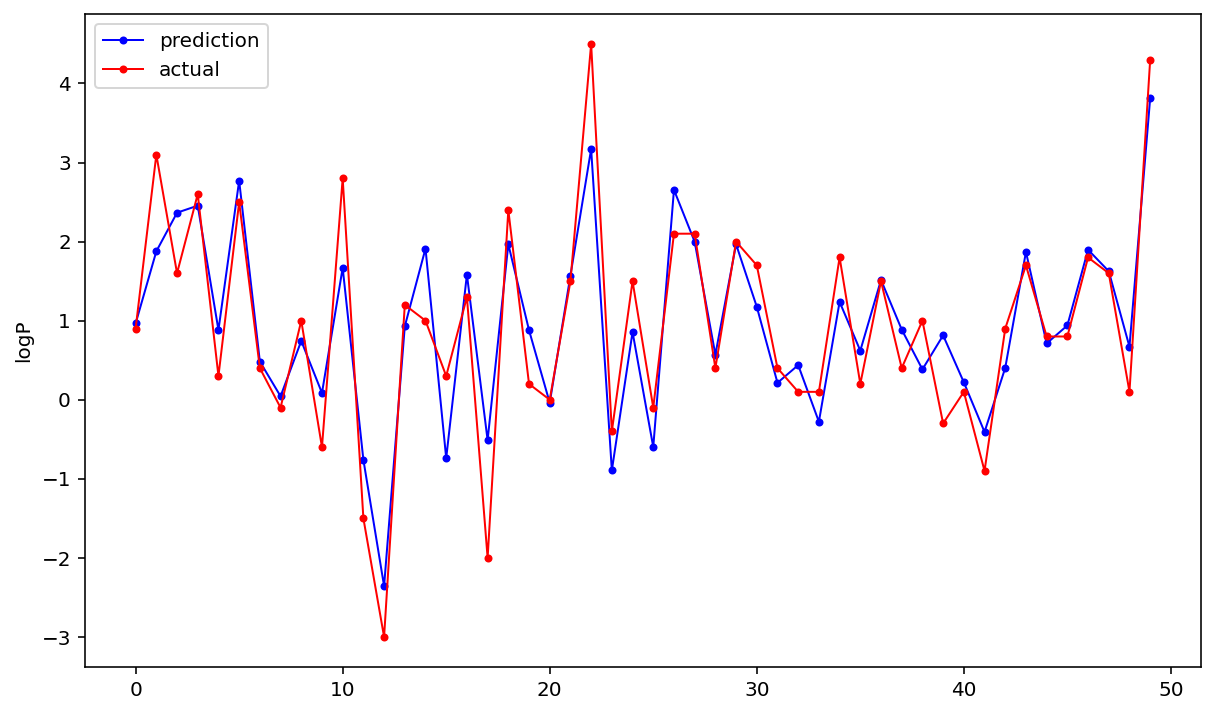

In [ ]:
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
show_reg_result(y_test, y_pred)

## Light GBM

- 부스팅 방식의 앙상블 모델인 Light GBM 사용하기
- 랜덤 포레스트와 성능이 비슷하며 학습 속도가 빠르다

R2: 0.8481
MAE: 0.3756
RMSE: 0.5053
Max error: 3.1833


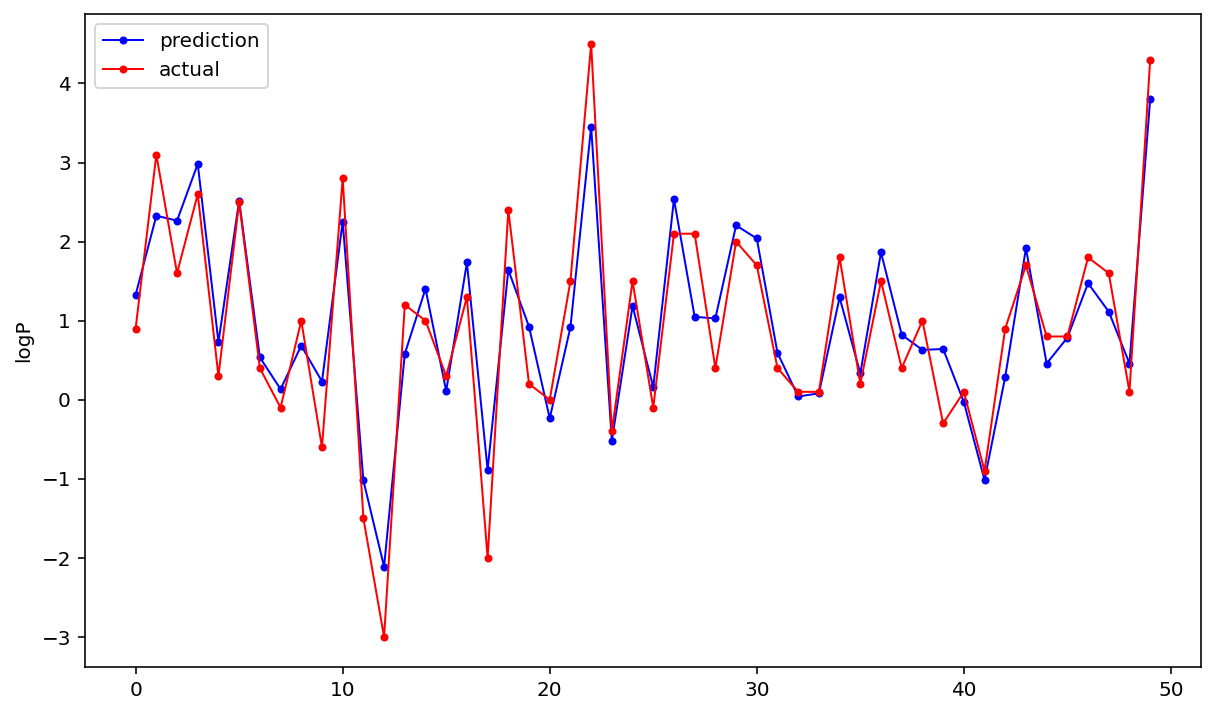

In [ ]:
from lightgbm import LGBMRegressor
lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test, y_pred)

## Scaffold Splitter

- 훈련과 검증 데이터를 나눌때 train_test_split를 사용하여 랜덤하게 나누지 않고 분자의 Scaffold를 고려하여 훈련과 검증 데이터에 유사한 Scaffold가 섞이지 않게 한다


In [ ]:
# Scaffold Splitter를 확인하기 위한 샘플 분자 정의
data_test= ["CC(C)Cl" , "CCC(C)CO" ,  "CCCCCCCO" , "CCCCCCCC(=O)OC" , "c3ccc2nc1ccccc1cc2c3" , "Nc2cccc3nc1ccccc1cc23" , "C1CCCCCC1" ]
Xs = np.zeros(len(data_test))
Ys = np.ones(len(data_test))

# deepchem dataset를 정의하고 deepchem이 제공하는 ScaffoldSplitter()를 수행한 결과 보기
dataset = dc.data.DiskDataset.from_numpy(X=Xs,y=Ys,w=np.zeros(len(data_test)),ids=data_test)
scaffoldsplitter = dc.splits.ScaffoldSplitter()
train, test = scaffoldsplitter.train_test_split(dataset)
train, test

<DiskDataset X.shape: (5,), y.shape: (5,), w.shape: (5,), ids: ['CC(C)Cl' 'CCC(C)CO' 'CCCCCCCO' 'CCCCCCCC(=O)OC' 'C1CCCCCC1'], task_names: [0]>

In [ ]:
test

<DiskDataset X.shape: (2,), y.shape: (2,), w.shape: (2,), ids: ['c3ccc2nc1ccccc1cc2c3' 'Nc2cccc3nc1ccccc1cc23'], task_names: [0]>

- 앞의 예제에 Scaffold Splitter를 적용한 경우의 성능 보기

In [ ]:
Xs = df[['num_of_atoms', 'num_of_heavy_atoms',
       'num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms',
       'tpsa', 'mol_w', 'num_valence_electrons', 'num_heteroatoms']]
Ys = df['logP']
ids = df['smiles']

In [ ]:
dataset = dc.data.DiskDataset.from_numpy(X=Xs,y=Ys,w=np.zeros(len(Xs)),ids=ids)
scaffoldsplitter = dc.splits.ScaffoldSplitter()
train,test = scaffoldsplitter.train_test_split(dataset)

In [ ]:
train

<DiskDataset X.shape: (1326, 10), y.shape: (1326,), w.shape: (1326,), task_names: [0]>

In [ ]:
test

<DiskDataset X.shape: (13284, 10), y.shape: (13284,), w.shape: (13284,), task_names: [0]>

- 학습 수행 및 성능 보기

R2: 0.701
MAE: 0.5575
RMSE: 0.7124
Max error: 3.7252


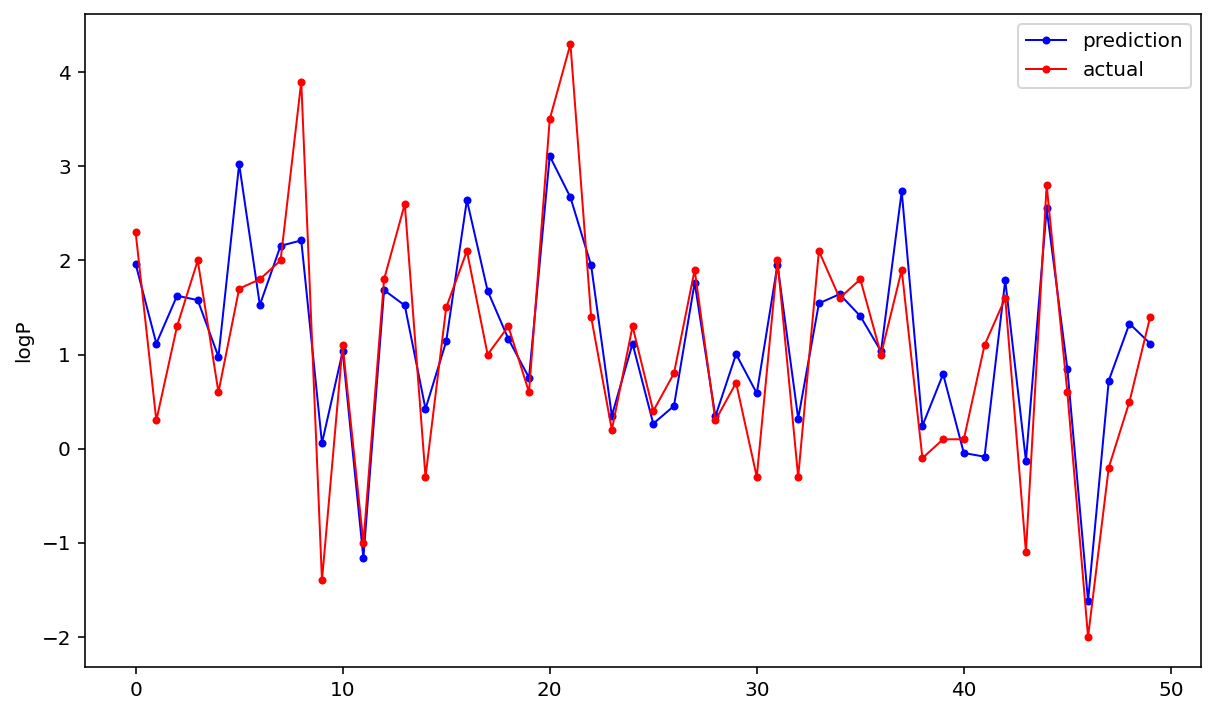

In [ ]:
lin.fit(train.X, train.y)
y_pred = lin.predict(test.X)
show_reg_result(test.y, y_pred)

# Graph를 사용
- 분자 표현형으로 그래프 객체인 ConvMol을 사용하고 머신러닝 모델로 GraphConvModel을 사용한다